<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
df_2 = pd.read_csv('/datasets/products.csv',sep=';')
df_3 = pd.read_csv('/datasets/aisles.csv',sep=';')
df_4 = pd.read_csv('/datasets/departments.csv',sep=';')
df_5 = pd.read_csv('/datasets/order_products.csv',sep=';')

In [3]:
df.info(show_counts=True)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

In [4]:
df_2.info(show_counts=True)
print(df_2.head(3000))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
      product_id                                       product_name  aisle_id  \
0              1                         Chocolate Sandwich Cookies        61   
1              2                                   All-Seasons Salt       104   
2              3               Robust Golden Unsweetened Oolong Tea        94   
3              4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4              5                          Green Chile Anytime Sauce         5   
...          ...                                                ...       ...   
2995        2996 

In [5]:
df_3.info(show_counts=True)
print(df_3.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [6]:
df_4.info(show_counts=True)
print(df_4.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [7]:
df_5.info(show_counts=True)
print(df_5.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de leer los datos al utilizar el separador correcto y buenas observaciones iniciales.<br/>


</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Recomiendo utilizar nombres de variables que sean descriptivas, es decir que nos indiquen con el nombre el contenido, ejemplo:

En lugar de utilizar:
```
df = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
```

Utilizar:
```
df_orders = pd.read_csv('/datasets/instacart_orders.csv',sep=';')
```
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Lo primero que visualizo es que en cada dataframe cuenta con varias columnas, estas cuentan con nombres adecuados para el valor que tiene que cada fila ademas el tipo es correcto (int, float, objet) de acuerdo sea el caso, ademas que se encuentran varios datos faltantes y es necesario revisar si hay valores duplicados.


# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

En este caso hay que hacer una limpieza de datos primeeo asegurarce de que los datos correspondan al valor correcto y despues encontrar valores duplicados y ausentes para elinarlos o sustituirlos en cual caso sea el mejor.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print(df.duplicated().sum())
print(df.duplicated())

15
0         False
1         False
2         False
3         False
4         False
          ...  
478962    False
478963    False
478964    False
478965    False
478966    False
Length: 478967, dtype: bool


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

Si, cuentan con 15 valores duplicados. 
todos se hicieeron el mismo dia a la misma hora.

In [9]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
duplicated_wend = df[(df['order_dow']== 3) & (df['order_hour_of_day']==2)]
#print(duplicated_wend)

In [10]:
unique_user = duplicated_wend['user_id'].nunique()
print(unique_user)

106


¿Qué sugiere este resultado?
Que hay compras que se reptieron el mismo día y hora. 

In [11]:
# Elimina los pedidos duplicados
df = df.drop_duplicates().reset_index(drop=True)


In [12]:
# Vuelve a verificar si hay filas duplicadas
print(df.duplicated().sum())


0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df['order_id'].duplicated().sum())

0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los duplicados fueron eliminados correctamente
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos

Verifique si existen valores duplicados y busque en los id de usuarios para er donde se repetian y determinar cuales eran los valores duplicados.

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
print(df_2.duplicated().sum())


0


In [15]:
# Revisa únicamente si hay ID de productos duplicados
print(df_2['product_id'].duplicated().sum())


0


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_2['product_name'] = df_2['product_name'].str.upper()
print(df_2['product_name'].unique())

['CHOCOLATE SANDWICH COOKIES' 'ALL-SEASONS SALT'
 'ROBUST GOLDEN UNSWEETENED OOLONG TEA' ... 'ARTISAN BAGUETTE'
 'SMARTBLEND HEALTHY METABOLISM DRY CAT FOOD' 'FRESH FOAMING CLEANSER']


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
print(df_2['product_name'].isna().sum())

1258


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los datos han sido revisados apropiadamente
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Los valores ausentes solamente se encuentran en la columna 'product_name' al igual que los valores duplicados.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(df_4.duplicated().sum())

0


In [19]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(df_4['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Veo que el dataframe se encuentra limpio y en orden sin elementos duplicados ni ausentes 

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(df_3.duplicated().sum())

0


In [21]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(df_3['aisle'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Al parecer el dataframe se encuentra limpio y sin ningun valor duplicado o ausente.

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(df_5.duplicated().sum())

0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(df_5.nunique())
print()
print(df_5['order_id'].duplicated().sum())

order_id             450046
product_id            45573
add_to_cart_order        64
reordered                 2
dtype: int64

4094961


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se verifico filas completamente duplicadas, pero al verificar el id de la orden hay muchos valores repetidos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Estos últimos dataframes no cuentan con filas totalmente duplicadas.

</div>


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
val_aus_prod = df_2['product_name'].isna().sum()
print(val_aus_prod)

1258


Describe brevemente cuáles son tus hallazgos.

Encontre muchos valores ausentes en la columna 'product_name'

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
aus_id_100 = df_2[df_2['aisle_id']==100]
print(aus_id_100.isna().sum())

#print(df_2[df_2['aisle_id']==100]('aisle_id').isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos

Todos los valores ausentes se encuentran en el pasillo con ID 100

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
aus_id_21 = df_2[df_2['department_id']==21]
print(aus_id_21.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos

Todos los nombres con valores ausentes sen encuentean en el departamento con ID 21

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
ver_aus = df_2[(df_2['aisle_id']==100) & (df_2['department_id']==21)]

print(ver_aus.isna().sum())

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64


Describe brevemente cuáles son tus hallazgos

Los datos faltantes se encuentran en estas tablas 

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
df_2 = df_2.fillna('Unknown')
print(df_2[df_2['product_name']=='Unknown'])

       product_id product_name  aisle_id  department_id
37             38      Unknown       100             21
71             72      Unknown       100             21
109           110      Unknown       100             21
296           297      Unknown       100             21
416           417      Unknown       100             21
...           ...          ...       ...            ...
49552       49553      Unknown       100             21
49574       49575      Unknown       100             21
49640       49641      Unknown       100             21
49663       49664      Unknown       100             21
49668       49669      Unknown       100             21

[1258 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se encontraron 1258 nombres entradas con valor faltante en el nombre del producto las cuales conincidian en que todas se encontraban en el pasillo con id 100 y con el c¿departamento con id 21, se corrige el valor con 'Unknown' y se revisa el cambio queda sin valores ausentes.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


### `orders` data frame

In [29]:
# Encuentra los valores ausentes
print(df.isna().sum())
print()
#print(df_5['add_to_cart_order'].sort_values().unique())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64



In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df['days_since_prior_order'].isna().sum())

28817


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Solo se encunetran datos faltantes en los dias despues del primer pedido. 

puede indicar que no se registro el dia en el que se hizo la siguiente compra.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

Te dejo una manera de comprobar que todos los valores ausentes corresponden a la primera orden
</div>


In [31]:
# Código del revisor
missing_values_not_first_order = df[df['order_number'] > 1]['order_number'].isnull().sum()

print(missing_values_not_first_order)

0


### `order_products` data frame

In [32]:
# Encuentra los valores ausentes
df_5.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [33]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_5['add_to_cart_order'].min())
print()
print(df_5['add_to_cart_order'].max())

1.0

64.0


Describe brevemente cuáles son tus hallazgos.

Parece que al momento de ejecutar el pedido no se registro el momento en que se agrega el siguiente producto en estos casos.

In [34]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
df_5 = df_5.fillna(0)
condicion_busq = df_5[df_5['add_to_cart_order']==0]
print(condicion_busq['order_id'])
#df_5.info(show_counts=True)

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64


In [35]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
pedidos_con_ausentes = df_5[df_5['add_to_cart_order'] == 0]['order_id'].unique()

productos_por_pedido = df_5[df_5['order_id'].isin(pedidos_con_ausentes)].groupby('order_id')['product_id'].count()
print(productos_por_pedido)
print()
print(productos_por_pedido.min())

order_id
9310        65
61355      127
102236      95
129627      69
165801      70
          ... 
2999801     70
3125735     86
3308010    115
3347453     71
3383594     69
Name: product_id, Length: 70, dtype: int64

65


Describe brevemente cuáles son tus hallazgos.

Todas las ordenes con valores faltantes en add_to_cart_order cuentan con un minimo de productos pedidos de 65.

In [36]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
df_5 = df_5.fillna(999)
df_5['add_to_cart_order'] = df_5['add_to_cart_order'].astype(int)
df_5.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int64
 3   reordered          4545007 non-null  int64
dtypes: int64(4)
memory usage: 138.7 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

El dataframe se encuentra limpo con los valores ausentes asignados con el valor 999 y con el tipo int que contiene un tipo de dato mas adecuado para la columna.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

El prosesamiento de datos se llevo a cabo de forma correcta y ya no se cuentan con valores ausentes ni duplicados cual sea el mejor caso, encontre algunas observaciones commo que habia datos los datos de los faltantes en el data products se encontraban en el mismo pasillo y departamento o que las ordenes con datos faltantes siempre eran despues del primer pedido, en conclusion los datos ya se encuentran limpos y procesados.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [37]:
#verifica que los valores de 'order_hour_of_day ocsilen entre 0 y 23'
#Para verificar el valor minimo
print(df['order_hour_of_day'].min())
print()
#Para verificar el valor maximo
print(df['order_hour_of_day'].max())


0

23


In [38]:
#Verificar que los valores de 'order_dow' oscilen entre 0 y 6
print(df['order_dow'].min())
print()
print(df['order_dow'].max())


0

6


Escribe aquí tus conclusiones
Despues de verificar el valor maximo y minimo en los dos casos los valores oscilan en el rango que se cuestiono.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Se verificó que los datos sean sensibles correctamente
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

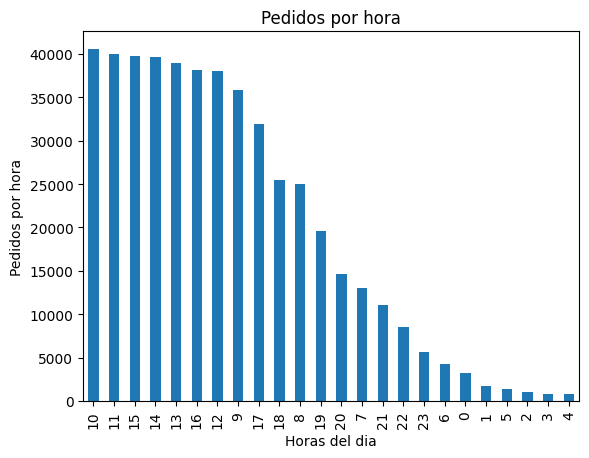

In [39]:
orden_por_hora = df['order_hour_of_day'].value_counts()
orden_por_hora.plot(kind='bar', title='Pedidos por hora', xlabel='Horas del dia', ylabel='Pedidos por hora')
plt.show()

Escribe aquí tus conclusiones

Entre las 0 y las 18 horas es el momento en el que mas se hacen pedidos apartir de la hora 19 en adelante la demanda es mucho menor tal vez porque sea muy tarde en la noche.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Buena manera de hacer la agrupación de los datos.

Recomiendo no ordenar los valores de mayor a menor, recomiendo ordenarlos por la hora del día para seguir una secuencia lógica de como cambía poco a poco el día
</div>


### [A3] ¿Qué día de la semana compran víveres las personas?

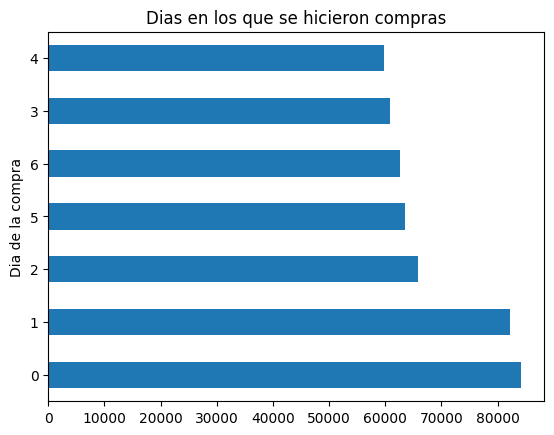

In [40]:
#Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
pedidos_por_dia = df['order_dow'].value_counts()
pedidos_por_dia.plot(title='Dias en los que se hicieron compras', xlabel='Dia de la compra', ylabel='Compras unicas', kind='barh', ylim=[0,7])
plt.show()

Escribe aquí tus conclusiones

El dia en que mas se hacen compras es el dia domingo y el dia lunes y el dia en que menos se hacen compras es el dia jueves los demas dias de la semana se hacen una cantidad de compras muy similar.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Los domingos son los días preferidos de los clientes
</div>


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

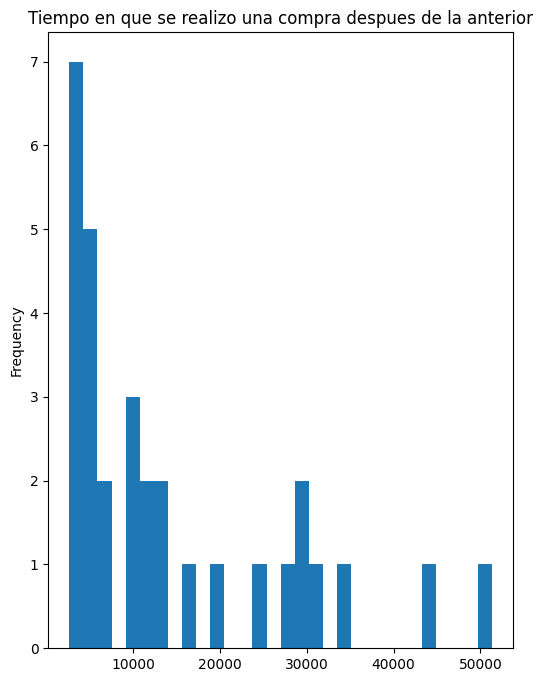

In [41]:
dias_para_otro_pedido = df['days_since_prior_order'].value_counts()
dias_para_otro_pedido.plot(title='Tiempo en que se realizo una compra despues de la anterior', xlabel='Dia en el que se hizo una compra', ylabel='dias que tardaron en hacer una compra', kind='hist', bins=30, figsize=[6,8])
plt.show()

#print(df['days_since_prior_order'].max())
#print(df['days_since_prior_order'].value_counts())


Escribe aquí tus conclusiones 

De 0 a 15 dias tienen valores similares en los dias que se hixo un pedido, de 16 a 29 hay valores mas separados entre 2000 y 6000 son los dias que tardaron en hacer un pedido, y la maoria de ususarios tardo mas de 30 dias en hacer su siguiente pedido, pero en general nadie esparea mas de 10 dias en hacer su pedido es el promedio.


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!

El histograma ya agrupa los datos por lo que no es necesario hacer una agrupación previa, te dejo el ejemplo en la celda de abajo
</div>


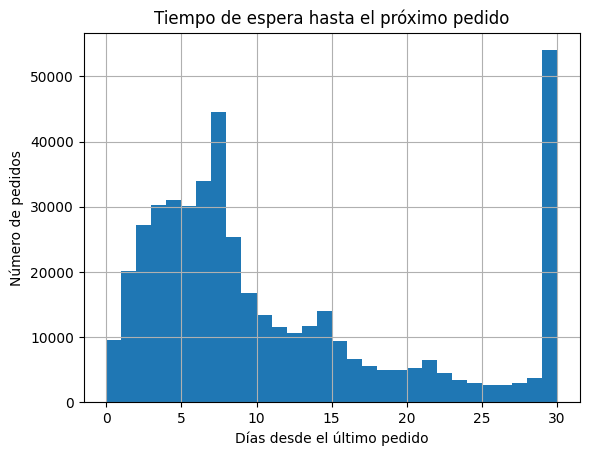

In [42]:
df['days_since_prior_order'].hist(bins=30)
plt.xlabel('Días desde el último pedido')
plt.ylabel('Número de pedidos')
plt.title('Tiempo de espera hasta el próximo pedido')
plt.show()

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
#¿Existe alguna diferencia entre las distribuciones 'order_hour_of_day' de los miércoles y los sábados? Traza gráficos de barra de 'order_hour_of_day' para ambos días en la misma figura y describe las diferencias que observes.

df_wend = df[df['order_dow']==3]
df_satu = df[df['order_dow']==6]


In [44]:
print("Datos de miércoles:", len(df_wend))
print("Datos de sábados:", len(df_satu))


Datos de miércoles: 60897
Datos de sábados: 62649


In [45]:
print("Rango horas miércoles:", df_wend['order_hour_of_day'].min(), "-", df_wend['order_hour_of_day'].max())
print("Rango horas sábados:", df_satu['order_hour_of_day'].min(), "-", df_satu['order_hour_of_day'].max())

Rango horas miércoles: 0 - 23
Rango horas sábados: 0 - 23


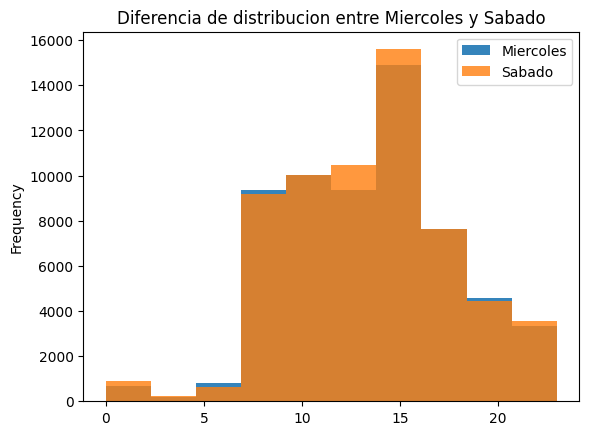

In [46]:
df_wend['order_hour_of_day'].plot(title='Diferencia de distribucion entre Miercoles y Sabado', kind='hist', alpha=0.9)
df_satu['order_hour_of_day'].plot(kind='hist', alpha=0.8)
plt.legend(['Miercoles', 'Sabado'])
plt.show(['wend', 'satu'])

Escribe aquí tus conclusiones
Parece que no hay mucha diferencia en estos dias son dias en los que se hacen casi los mismos pedidos.


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!
<br />
Buena manera de mostrar los resultados de ambos días en una misma grafica
</div>


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [47]:
cuantos_pedidos = df['user_id'].value_counts()
pedidos_por_cliente = cuantos_pedidos.value_counts()
#print(pedidos_por_cliente)

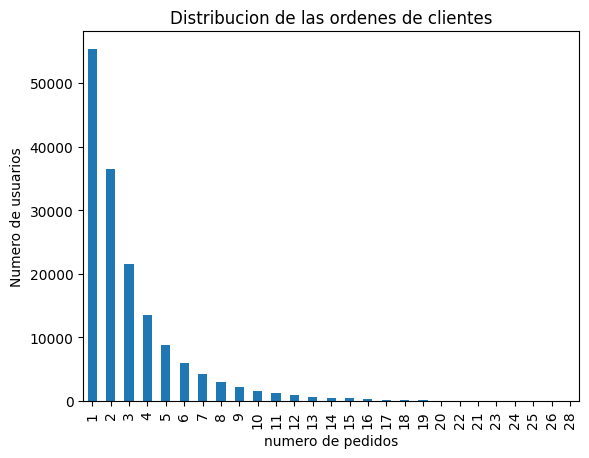

In [48]:
pedidos_por_cliente.plot(title='Distribucion de las ordenes de clientes', kind='bar', xlabel='numero de pedidos', ylabel='Numero de usuarios')
plt.show()

Escribe aquí tus conclusiones

La mayoria de los clientes solo hacen un pedido lo cual representa un problema grave.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 

La mayoría de usuarios no ha hecho muchos pedidos, buenas observaciones.

</div>


### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [49]:
#¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?
#print(df_5['product_id'].value_counts())
prod_pop = df_5['product_id'].value_counts()



In [50]:
data_name_y_id = prod_pop.reset_index()

In [51]:
names_y_ids = data_name_y_id.merge(df_2[['product_id', 'product_name']], on='product_id', how='left')
print(names_y_ids.head(20))

    index  product_id                                       product_name
0   24852       66050                                                NaN
1   13176       53297                                                NaN
2   21137       37039                                    SHIRAZ CABERNET
3   21903       33971                                      SLIDERS ROLLS
4   47209       29773                                            Unknown
5   47766       24689         WITH OLIVE OIL SQUEEZE MAYONNAISE DRESSING
6   47626       21495                        EXTRA EXTRA DRY ULTRA FRESH
7   16797       20018                                        CHEESE BUNS
8   26209       19690                                  GREEN OAK LETTUCE
9   27845       19600   CLASSIC MEAL FOR 2 CHICKEN FLORENTINE & FARFALLE
10  27966       19197            SHOW ME THE HONEY CRUNCHY COCONUT CHIPS
11  22935       15898  MANGO PEACH OMEGA SWIRL OMAGE-3 FISH OIL SUPPL...
12  24964       15292                           MAD

Escribe aquí tus conclusiones

Los productos son muy variables pero en este caso podemos ver que los productos mas comunes tienen mucha demanda podria buscarse una forma de inpulsar los menos populares por hora.



<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />

En los ejercicios `B3`, `C2` y `C5` el conteo de los productos es correcto, pero los nombres que aparecen para los productos no corresponden con los que deberían, esto se debe a que en la columna que muestras `index` es en realidad el `product_id` y la columna `product_id` es en realidad el conteo de los productos, es por esto que en el producto más vendido `66050` no aparece un producto en el nombre, ya que no existen tantos productos, te dejo un ejemplo de como resolver este ejercicio en la celda de abajo, mismo que puedes utilizar para `C2` y `C5` con la diferencia de que estos últimos dos requieren un filtrado al inicio
</div>


In [68]:
# Código del revisor
productos_reordenados_counts = df_5['product_id'].value_counts().head(20)

top_20_reordenados = productos_reordenados_counts.reset_index()

top_20_reordenados.columns = ['product_id', 'reorder_count']

top_20_reordenados = top_20_reordenados.merge(df_2[['product_id', 'product_name']], on='product_id', how='left')

print(top_20_reordenados[['product_id', 'product_name', 'reorder_count']])

    product_id              product_name  reorder_count
0        24852                    BANANA          66050
1        13176    BAG OF ORGANIC BANANAS          53297
2        21137      ORGANIC STRAWBERRIES          37039
3        21903      ORGANIC BABY SPINACH          33971
4        47209      ORGANIC HASS AVOCADO          29773
5        47766           ORGANIC AVOCADO          24689
6        47626               LARGE LEMON          21495
7        16797              STRAWBERRIES          20018
8        26209                     LIMES          19690
9        27845        ORGANIC WHOLE MILK          19600
10       27966       ORGANIC RASPBERRIES          19197
11       22935      ORGANIC YELLOW ONION          15898
12       24964            ORGANIC GARLIC          15292
13       45007          ORGANIC ZUCCHINI          14584
14       39275       ORGANIC BLUEBERRIES          13879
15       49683            CUCUMBER KIRBY          13675
16       28204        ORGANIC FUJI APPLE        

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [52]:
productos_por_pedido = df_5.groupby('order_id')['add_to_cart_order'].max()
print('Numero maximo de productos por pedido')
print(productos_por_pedido.head(10))
print(productos_por_pedido.describe())

Numero maximo de productos por pedido
order_id
4     13
9     15
11     5
19     3
20     8
31    10
48     8
56    10
61    12
68     9
Name: add_to_cart_order, dtype: int64
count    450046.000000
mean         10.097126
std           7.523747
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max          64.000000
Name: add_to_cart_order, dtype: float64


In [53]:
print('Promedio de productos por pedido')
mean_prod = productos_por_pedido.mean()
print(mean_prod)

Promedio de productos por pedido
10.097125627158112


<AxesSubplot:ylabel='Frequency'>

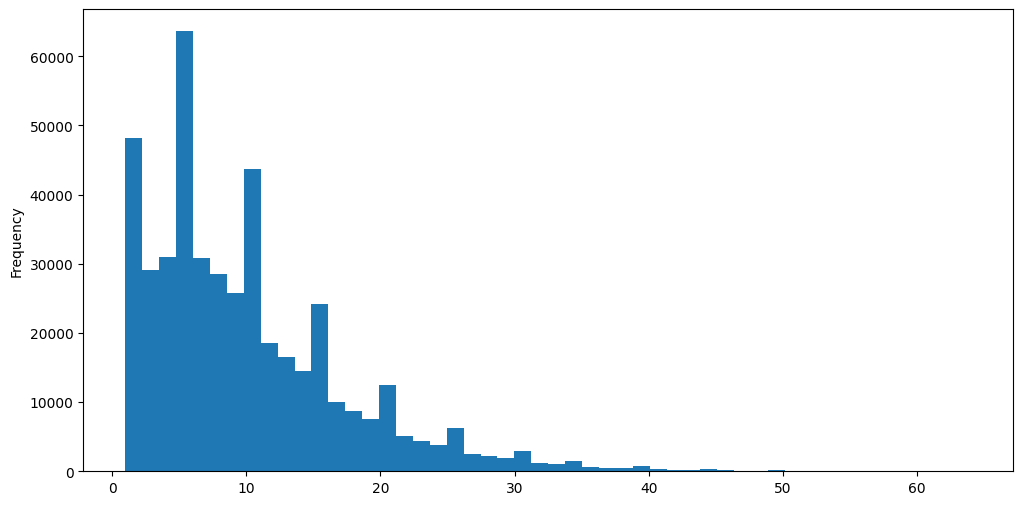

In [54]:
productos_por_pedido.plot(kind='hist', bins=50, figsize=(12, 6))

Escribe aquí tus conclusiones

Puedo ver que en la mayoria de pedidos la media es de diez articulos por pedido, los pedidos de mas de 10 articulos son menos comunes entre mas articulos cuenten, esto puede indicar que las personas solo ordenan cosas muy especficas y no buscan hacer una despensa mayor, quiza podrian enfocarze en poner ofertas para pedidos con mas de 20 ariculos para que sea mas comun que la gente haga este tipo de pedidos.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, el resultado es correcto, los usuarios suelen pedir alrededor de 10 articulos
</div>


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [55]:
#¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
prod_reor = df_5[df_5['reordered']==1]

In [56]:
reorder_count = prod_reor['product_id'].value_counts()
reorder_df = reorder_count.reset_index()

In [57]:
prod_reor_name_id = reorder_df.merge(df_2[['product_id', 'product_name']], on='product_id') 
print(prod_reor_name_id.columns)

Index(['index', 'product_id', 'product_name'], dtype='object')


In [58]:
print(prod_reor_name_id.sort_values(by='product_id', ascending=False).head(20))

    index  product_id                                       product_name
0   13176       44450                                   ALLIUM CEPA 30 C
1   21137       28639  EXOTIC PAPAYA & HIBISCUS FLOWER SCENTED OIL RE...
2   21903       26233               ORGANIC EINKORN GINGER SPICE COOKIES
3   47209       23629  RISERVA BALSAMIC VINEGAR & CARAMELIZED ONIONS ...
4   47766       18743     DARK CHOCOLATE CHEESECAKE SOFT DESSERT COOKIES
5   27845       16251                               DOUBLE CREAM CREMONT
6   47626       15044                             QUARK SEA SALT CARAMEL
7   27966       14748    SOFT WHITE 200 WATTS GENERAL PURPOSE LIGHT BULB
8   16797       13945                        2 IN 1 WHITENING TOOTHPASTE
9   26209       13327                       100% COLOMBIAN MEDIUM COFFEE
10  22935       11145                 UNBLEACHED WHITE FINE PASTRY FLOUR
11  24964       10411                                   CAULIFLOWER HEAD
12  45007       10076                              

Escribe aquí tus conclusiones

Los productos que se vuelven a ordenar son bastante variados pero observo que la moyoria de estos ccontenen azucar podria ser un veneficio investigar si estos productos son mayoria para poder crear algun tipo de oferta.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [59]:
print('Proporcion de orden y reorden')
df_5.groupby('product_id')['reordered'].mean()

Proporcion de orden y reorden


product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64

In [60]:
conteo_reordenes = df_5['reordered'].value_counts()
print("Conteo de pedidos")
print(conteo_reordenes)

Conteo de pedidos
1    2683838
0    1861169
Name: reordered, dtype: int64


In [61]:
print("Porcentaje por compra y recompra")
print(df_5['reordered'].value_counts(normalize=True))

Porcentaje por compra y recompra
1    0.590503
0    0.409497
Name: reordered, dtype: float64


Escribe aquí tus conclusiones

Se hacen mas recompras que de cada producto por pedido casi un 10% mas.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [62]:
datos_reor_id = df.merge(df_5, on='order_id' )

In [63]:
pedidos_reor = datos_reor_id.groupby('user_id')['reordered'].mean()
print(pedidos_reor)

user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


Escribe aquí tus conclusiones

La mayoria de los clientes reordenan al mneos uno de sus pedidos despues de su primero compra.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de realizar las proporciones
</div>


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [64]:
filtro_val = df_5[df_5['add_to_cart_order']==1]
print(filtro_val)

         order_id  product_id  add_to_cart_order  reordered
1          567889        1560                  1          1
2         2261212       26683                  1          1
14        1961225       37553                  1          1
16         639939       10017                  1          1
23         750040        8518                  1          0
...           ...         ...                ...        ...
4544978   1759009       46175                  1          0
4544989    115427       20842                  1          1
4544990   2049780       28576                  1          1
4544997   2300092       10017                  1          0
4544999   1622300       24852                  1          1

[450046 rows x 4 columns]


In [65]:

cont_prod = filtro_val['product_id'].value_counts()
print(cont_prod)


24852    15562
13176    11026
27845     4363
21137     3946
47209     3390
         ...  
10628        1
8581         1
35216        1
43412        1
4094         1
Name: product_id, Length: 26760, dtype: int64


In [66]:
primeros = cont_prod.head(20).reset_index()
primeros_20 = primeros.merge(df_2[['product_id', 'product_name']], on='product_id')
print(primeros_20)

    index  product_id                                       product_name
0   24852       15562             VITAMIN CODE RAW D3 VITAMIN SUPPLEMENT
1   13176       11026                                            Unknown
2   27845        4363                                    AMBROSIA APPLES
3   21137        3946        HOMEMADE ICE CREAM BALLS CHOCOLATE ESPRESSO
4   47209        3390                                             PAPAYA
5   21903        3336    FRUIT & ALMOND BUTTER BLUEBERRY CINNAMON WALNUT
6   47766        3044            ORIGINAL 100% PURE NO PULP ORANGE JUICE
7   19660        2336   PASTA SIDES- PARMESAN FETTUCCINI & SPINACH PASTA
8   16797        2308                                     BUBBLEMINT GUM
9   27966        2024  ORGANIC DICED TOMATOES FIRE ROASTED WITH MEDIU...
10  44632        1914   ORIGINAL HABANERO PEPPER SAUCE- XXXTRA HOT SAUCE
11  49235        1797                           ANTIBACTERIAL SOAP BEIGE
12  47626        1737                         POPCO

Escribe aquí tus conclusiones

Los productos son muy varios en el reorden pero se suelen reordenar los mismos productos por mel mismo usuario, algunos usuarios tienen compras similares esto puede ser interesante tambien.

### Conclusion general del proyecto:

Algunos de los datafrems muestran valores similares pero tienen un significado diferente para cada uno es muy interesante ver como los cluentes suelen hacer sus compras el mismo dia y en horas similares ademas de que suelen hacer reordenes de los mismos productos por otro lado es un area de oportunidad ver que la mayora de los clientes registrados solo hacen un pedio y de muy pcos articulos podriamos revisar las especificaciones de esos articulos para saber ppr que la gente los suele ordenar y hacer alguna propuesta para articulos que no sean tan solicitados al igual que en el numero de productos por pedido se podria establecer una promocion de envio gratis depues de cierta cantidad de productos.
    en conclusion el datafreme muestra muchas areas de oportunidad para la platforma, espero que mis hayasgos sean 

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las conclusiones a las que llegaste son buenas y los procedimientos realizados son correctos. Considero que este es un proyecto que se empieza a asemejar más a algún proyecto que te pidan en un trabajo, a partir de análisis de este tipo se pueden diseñar estrategias de marketing específicas para ciertos productos o se pueden optimizar los procesos internos para tener disponibles más rápidamente los productos que se venden más seguido.<br/>
    

Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>


<div class="alert alert-block alert-success">
<b>Aspectos positivos del proyecto</b> <a class="tocSkip"></a><br />

- Las observaciones intermedias, así como las conclusiones finales me parecen buenas
- Las graficas utilizadas me parecen del tipo correcto
- El proyecto esta ordenado
    
</div>

<div class="alert alert-block alert-warning">
<b>Aspectos que pueden mejorar del proyecto</b> <a class="tocSkip"></a><br />

- Hay varios puntos indicados con los comentarios en amarillo

</div>
